task4

# 向量化和广播

向量化和广播这两个概念是 numpy 内部实现的基础。有了向量化，编写代码时无需使用显式循环。这些循环实际上不能省略，只不过是在内部实现，被代码中的其他结构代替。向量化的应用使得代码更简洁，可读性更强，也可以说使用了向量化方法的代码看上去更“Pythonic”。

广播（Broadcasting）机制描述了 numpy 如何在算术运算期间处理具有不同形状的数组，让较小的数组在较大的数组上“广播”，以便它们具有兼容的形状。并不是所有的维度都要彼此兼容才符合广播机制的要求，但它们必须满足一定的条件。

若两个数组的各维度兼容，也就是两个数组的每一维等长，或其中一个数组为 一维，那么广播机制就适用。如果这两个条件不满足，numpy就会抛出异常，说两个数组不兼容。

总结来说，广播的规则有三个：
- 如果两个数组的维度数dim不相同，那么小维度数组的形状将会在左边补1。
- 如果shape维度不匹配，但是有维度是1，那么可以扩展维度是1的维度匹配另一个数组；
- 如果shape维度不匹配，但是没有任何一个维度是1，则匹配引发错误；


【例】二维数组加一维数组

```python
import numpy as np

x = np.arange(4)
y = np.ones((3, 4))
print(x.shape)  # (4,)
print(y.shape)  # (3, 4)

print((x + y).shape)  # (3, 4)
print(x + y)
# [[1. 2. 3. 4.]
#  [1. 2. 3. 4.]
#  [1. 2. 3. 4.]]
```


【例】两个数组均需要广播
```python
import numpy as np

x = np.arange(4).reshape(4, 1)
y = np.ones(5)

print(x.shape)  # (4, 1)
print(y.shape)  # (5,)

print((x + y).shape)  # (4, 5)
print(x + y)
# [[1. 1. 1. 1. 1.]
#  [2. 2. 2. 2. 2.]
#  [3. 3. 3. 3. 3.]
#  [4. 4. 4. 4. 4.]]

x = np.array([0.0, 10.0, 20.0, 30.0])
y = np.array([1.0, 2.0, 3.0])
z = x[:, np.newaxis] + y 
print(z)
# [[ 1.  2.  3.]
#  [11. 12. 13.]
#  [21. 22. 23.]
#  [31. 32. 33.]]
```

【例】不匹配报错的例子
```python
import numpy as np

x = np.arange(4)
y = np.ones(5)

print(x.shape)  # (4,)
print(y.shape)  # (5,)

print(x + y)
# ValueError: operands could not be broadcast together with shapes (4,) (5,) 
```

In [3]:
import numpy as np
print(np.version.full_version)

1.18.5


In [170]:
#【例】二维数组加一维数组
x = np.arange(4)
y = np.ones((3, 4))
print(x.shape)  # (4,)
print(y.shape)  # (3, 4)

print((x + y).shape)  # (3, 4)
print(x)
print(y)
print(x + y)
# [[1. 2. 3. 4.]
#  [1. 2. 3. 4.]
#  [1. 2. 3. 4.]]

(4,)
(3, 4)
(3, 4)
[0 1 2 3]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


In [171]:
#【例】两个数组均需要广播
x = np.arange(4).reshape(4, 1)
y = np.ones(5)

print(x.shape,'\n',x)  # (4, 1)
print(y.shape,'\n',y)  # (5,)

print((x + y).shape)  # (4, 5)
print(x + y)
# [[1. 1. 1. 1. 1.]
#  [2. 2. 2. 2. 2.]
#  [3. 3. 3. 3. 3.]
#  [4. 4. 4. 4. 4.]]

(4, 1) 
 [[0]
 [1]
 [2]
 [3]]
(5,) 
 [1. 1. 1. 1. 1.]
(4, 5)
[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


In [172]:
x = np.array([0.0, 10.0, 20.0, 30.0])
y = np.array([1.0, 2.0, 3.0])
print(x)
print(y)
z = x[:, np.newaxis] # x[:, np.newaxis]升维
print(z)
z = x[:, np.newaxis] + y
print(z)
# [[ 1.  2.  3.]
#  [11. 12. 13.]
#  [21. 22. 23.]
#  [31. 32. 33.]]

[ 0. 10. 20. 30.]
[1. 2. 3.]
[[ 0.]
 [10.]
 [20.]
 [30.]]
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [173]:
#【例】不匹配报错的例子
x = np.arange(4)
y = np.ones(5)

print(x.shape,'\n',x)  # (4,)
print(y.shape,'\n',y)  # (5,)

print(x + y)
# ValueError: operands could not be broadcast together with shapes (4,) (5,) 

(4,) 
 [0 1 2 3]
(5,) 
 [1. 1. 1. 1. 1.]


ValueError: operands could not be broadcast together with shapes (4,) (5,) 

# 数学函数

## 算数运算

### numpy.add
- `numpy.add(x1, x2, *args, **kwargs)` Add arguments element-wise.    

### numpy.subtract
- `numpy.subtract(x1, x2, *args, **kwargs)` Subtract arguments element-wise.          

### numpy.multiply
- `numpy.multiply(x1, x2, *args, **kwargs)` Multiply arguments element-wise.      

### numpy.divide
- `numpy.divide(x1, x2, *args, **kwargs)` Returns a true division of the inputs, element-wise.         

### numpy.floor_divide
- `numpy.floor_divide(x1, x2, *args, **kwargs)` Return the largest integer smaller or equal to the division of the inputs.         

### numpy.power
- `numpy.power(x1, x2, *args, **kwargs)` First array elements raised to powers from second array, element-wise.       
    
    
在 numpy 中对以上函数进行了运算符的重载，且运算符为 **元素级**。也就是说，它们只用于位置相同的元素之间，所得到的运算结果组成一个新的数组。


【例】注意 numpy 的广播规则。
```python
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x + 1
print(y)
print(np.add(x, 1))
# [2 3 4 5 6 7 8 9]

y = x - 1
print(y)
print(np.subtract(x, 1))
# [0 1 2 3 4 5 6 7]

y = x * 2
print(y)
print(np.multiply(x, 2))
# [ 2  4  6  8 10 12 14 16]

y = x / 2
print(y)
print(np.divide(x, 2))
# [0.5 1.  1.5 2.  2.5 3.  3.5 4. ]

y = x // 2
print(y)
print(np.floor_divide(x, 2))
# [0 1 1 2 2 3 3 4]

y = x ** 2
print(y)
print(np.power(x, 2))
# [ 1  4  9 16 25 36 49 64]
```




【例】注意 numpy 的广播规则。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x + 1
print(y)
print(np.add(x, 1))
# [[12 13 14 15 16]
#  [17 18 19 20 21]
#  [22 23 24 25 26]
#  [27 28 29 30 31]
#  [32 33 34 35 36]]

y = x - 1
print(y)
print(np.subtract(x, 1))
# [[10 11 12 13 14]
#  [15 16 17 18 19]
#  [20 21 22 23 24]
#  [25 26 27 28 29]
#  [30 31 32 33 34]]

y = x * 2
print(y)
print(np.multiply(x, 2))
# [[22 24 26 28 30]
#  [32 34 36 38 40]
#  [42 44 46 48 50]
#  [52 54 56 58 60]
#  [62 64 66 68 70]]

y = x / 2
print(y)
print(np.divide(x, 2))
# [[ 5.5  6.   6.5  7.   7.5]
#  [ 8.   8.5  9.   9.5 10. ]
#  [10.5 11.  11.5 12.  12.5]
#  [13.  13.5 14.  14.5 15. ]
#  [15.5 16.  16.5 17.  17.5]]

y = x // 2
print(y)
print(np.floor_divide(x, 2))
# [[ 5  6  6  7  7]
#  [ 8  8  9  9 10]
#  [10 11 11 12 12]
#  [13 13 14 14 15]
#  [15 16 16 17 17]]

y = x ** 2
print(y)
print(np.power(x, 2))
# [[ 121  144  169  196  225]
#  [ 256  289  324  361  400]
#  [ 441  484  529  576  625]
#  [ 676  729  784  841  900]
#  [ 961 1024 1089 1156 1225]]
```

【例】注意 numpy 的广播规则。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.arange(1, 6)
print(y)
# [1 2 3 4 5]

z = x + y
print(z)
print(np.add(x, y))
# [[12 14 16 18 20]
#  [17 19 21 23 25]
#  [22 24 26 28 30]
#  [27 29 31 33 35]
#  [32 34 36 38 40]]

z = x - y
print(z)
print(np.subtract(x, y))
# [[10 10 10 10 10]
#  [15 15 15 15 15]
#  [20 20 20 20 20]
#  [25 25 25 25 25]
#  [30 30 30 30 30]]

z = x * y
print(z)
print(np.multiply(x, y))
# [[ 11  24  39  56  75]
#  [ 16  34  54  76 100]
#  [ 21  44  69  96 125]
#  [ 26  54  84 116 150]
#  [ 31  64  99 136 175]]

z = x / y
print(z)
print(np.divide(x, y))
# [[11.          6.          4.33333333  3.5         3.        ]
#  [16.          8.5         6.          4.75        4.        ]
#  [21.         11.          7.66666667  6.          5.        ]
#  [26.         13.5         9.33333333  7.25        6.        ]
#  [31.         16.         11.          8.5         7.        ]]

z = x // y
print(z)
print(np.floor_divide(x, y))
# [[11  6  4  3  3]
#  [16  8  6  4  4]
#  [21 11  7  6  5]
#  [26 13  9  7  6]
#  [31 16 11  8  7]]

z = x ** np.full([1, 5], 2)
print(z)
print(np.power(x, np.full([5, 5], 2)))
# [[ 121  144  169  196  225]
#  [ 256  289  324  361  400]
#  [ 441  484  529  576  625]
#  [ 676  729  784  841  900]
#  [ 961 1024 1089 1156 1225]]
```


【例】
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.arange(1, 26).reshape([5, 5])
print(y)
# [[ 1  2  3  4  5]
#  [ 6  7  8  9 10]
#  [11 12 13 14 15]
#  [16 17 18 19 20]
#  [21 22 23 24 25]]

z = x + y
print(z)
print(np.add(x, y))
# [[12 14 16 18 20]
#  [22 24 26 28 30]
#  [32 34 36 38 40]
#  [42 44 46 48 50]
#  [52 54 56 58 60]]

z = x - y
print(z)
print(np.subtract(x, y))
# [[10 10 10 10 10]
#  [10 10 10 10 10]
#  [10 10 10 10 10]
#  [10 10 10 10 10]
#  [10 10 10 10 10]]

z = x * y
print(z)
print(np.multiply(x, y))
# [[ 11  24  39  56  75]
#  [ 96 119 144 171 200]
#  [231 264 299 336 375]
#  [416 459 504 551 600]
#  [651 704 759 816 875]]

z = x / y
print(z)
print(np.divide(x, y))
# [[11.          6.          4.33333333  3.5         3.        ]
#  [ 2.66666667  2.42857143  2.25        2.11111111  2.        ]
#  [ 1.90909091  1.83333333  1.76923077  1.71428571  1.66666667]
#  [ 1.625       1.58823529  1.55555556  1.52631579  1.5       ]
#  [ 1.47619048  1.45454545  1.43478261  1.41666667  1.4       ]]

z = x // y
print(z)
print(np.floor_divide(x, y))
# [[11  6  4  3  3]
#  [ 2  2  2  2  2]
#  [ 1  1  1  1  1]
#  [ 1  1  1  1  1]
#  [ 1  1  1  1  1]]

z = x ** np.full([5, 5], 2)
print(z)
print(np.power(x, np.full([5, 5], 2)))
# [[ 121  144  169  196  225]
#  [ 256  289  324  361  400]
#  [ 441  484  529  576  625]
#  [ 676  729  784  841  900]
#  [ 961 1024 1089 1156 1225]]
```

In [174]:
#【例】注意 numpy 的广播规则。
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x + 1
print(y)
print(np.add(x, 1))
# [2 3 4 5 6 7 8 9]

[2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9]


In [175]:
y = x - 1
print(y)
print(np.subtract(x, 1))
# [0 1 2 3 4 5 6 7]

[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7]


In [176]:
y = x * 2
print(y)
print(np.multiply(x, 2))
# [ 2  4  6  8 10 12 14 16]

[ 2  4  6  8 10 12 14 16]
[ 2  4  6  8 10 12 14 16]


In [177]:
y = x / 2
print(y)
print(np.divide(x, 2))
# [0.5 1.  1.5 2.  2.5 3.  3.5 4. ]

[0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
[0.5 1.  1.5 2.  2.5 3.  3.5 4. ]


In [178]:
y = x // 2
print(y)
print(np.floor_divide(x, 2))
# [0 1 1 2 2 3 3 4]

[0 1 1 2 2 3 3 4]
[0 1 1 2 2 3 3 4]


In [179]:
y = x ** 2
print(y)
print(np.power(x, 2))
# [ 1  4  9 16 25 36 49 64]

[ 1  4  9 16 25 36 49 64]
[ 1  4  9 16 25 36 49 64]


In [180]:
##【例】注意 numpy 的广播规则。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x + 1
print(y)
print(np.add(x, 1))
# [[12 13 14 15 16]
#  [17 18 19 20 21]
#  [22 23 24 25 26]
#  [27 28 29 30 31]
#  [32 33 34 35 36]]

[[12 13 14 15 16]
 [17 18 19 20 21]
 [22 23 24 25 26]
 [27 28 29 30 31]
 [32 33 34 35 36]]
[[12 13 14 15 16]
 [17 18 19 20 21]
 [22 23 24 25 26]
 [27 28 29 30 31]
 [32 33 34 35 36]]


In [181]:
y = x - 1
print(y)
print(np.subtract(x, 1))
# [[10 11 12 13 14]
#  [15 16 17 18 19]
#  [20 21 22 23 24]
#  [25 26 27 28 29]
#  [30 31 32 33 34]]

[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]
[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]


In [182]:
y = x * 2
print(y)
print(np.multiply(x, 2))
# [[22 24 26 28 30]
#  [32 34 36 38 40]
#  [42 44 46 48 50]
#  [52 54 56 58 60]
#  [62 64 66 68 70]]

[[22 24 26 28 30]
 [32 34 36 38 40]
 [42 44 46 48 50]
 [52 54 56 58 60]
 [62 64 66 68 70]]
[[22 24 26 28 30]
 [32 34 36 38 40]
 [42 44 46 48 50]
 [52 54 56 58 60]
 [62 64 66 68 70]]


In [183]:
y = x / 2
print(y)
print(np.divide(x, 2))
# [[ 5.5  6.   6.5  7.   7.5]
#  [ 8.   8.5  9.   9.5 10. ]
#  [10.5 11.  11.5 12.  12.5]
#  [13.  13.5 14.  14.5 15. ]
#  [15.5 16.  16.5 17.  17.5]]

[[ 5.5  6.   6.5  7.   7.5]
 [ 8.   8.5  9.   9.5 10. ]
 [10.5 11.  11.5 12.  12.5]
 [13.  13.5 14.  14.5 15. ]
 [15.5 16.  16.5 17.  17.5]]
[[ 5.5  6.   6.5  7.   7.5]
 [ 8.   8.5  9.   9.5 10. ]
 [10.5 11.  11.5 12.  12.5]
 [13.  13.5 14.  14.5 15. ]
 [15.5 16.  16.5 17.  17.5]]


In [184]:
y = x // 2
print(y)
print(np.floor_divide(x, 2))
# [[ 5  6  6  7  7]
#  [ 8  8  9  9 10]
#  [10 11 11 12 12]
#  [13 13 14 14 15]
#  [15 16 16 17 17]]

[[ 5  6  6  7  7]
 [ 8  8  9  9 10]
 [10 11 11 12 12]
 [13 13 14 14 15]
 [15 16 16 17 17]]
[[ 5  6  6  7  7]
 [ 8  8  9  9 10]
 [10 11 11 12 12]
 [13 13 14 14 15]
 [15 16 16 17 17]]


In [185]:
y = x ** 2
print(y)
print(np.power(x, 2))
# [[ 121  144  169  196  225]
#  [ 256  289  324  361  400]
#  [ 441  484  529  576  625]
#  [ 676  729  784  841  900]
#  [ 961 1024 1089 1156 1225]]

[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]
[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]


In [186]:
#【例】注意 numpy 的广播规则。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.arange(1, 6)
print(x.shape,'\n',x)
print(y.shape,'\n',y)
# [1 2 3 4 5]

(5, 5) 
 [[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]
(5,) 
 [1 2 3 4 5]


In [190]:
z = x + y
#print(x.shape,'\n',x)
#print(y.shape,'\n',y)
print(z)
print(np.add(x, y))
# [[12 14 16 18 20]
#  [17 19 21 23 25]
#  [22 24 26 28 30]
#  [27 29 31 33 35]
#  [32 34 36 38 40]]

[[12 14 16 18 20]
 [17 19 21 23 25]
 [22 24 26 28 30]
 [27 29 31 33 35]
 [32 34 36 38 40]]
[[12 14 16 18 20]
 [17 19 21 23 25]
 [22 24 26 28 30]
 [27 29 31 33 35]
 [32 34 36 38 40]]


In [198]:
print(f'x.shape={x.shape},y.shape={y.shape}')
z = x - y
print(f'x - y=\n{z}')
print(np.subtract(x, y))
# [[10 10 10 10 10]
#  [15 15 15 15 15]
#  [20 20 20 20 20]
#  [25 25 25 25 25]
#  [30 30 30 30 30]]

x.shape=(5, 5),y.shape=(5,)
x - y=
[[10 10 10 10 10]
 [15 15 15 15 15]
 [20 20 20 20 20]
 [25 25 25 25 25]
 [30 30 30 30 30]]
[[10 10 10 10 10]
 [15 15 15 15 15]
 [20 20 20 20 20]
 [25 25 25 25 25]
 [30 30 30 30 30]]


In [199]:
z = x * y
print(z)
print(np.multiply(x, y))
# [[ 11  24  39  56  75]
#  [ 16  34  54  76 100]
#  [ 21  44  69  96 125]
#  [ 26  54  84 116 150]
#  [ 31  64  99 136 175]]

[[ 11  24  39  56  75]
 [ 16  34  54  76 100]
 [ 21  44  69  96 125]
 [ 26  54  84 116 150]
 [ 31  64  99 136 175]]
[[ 11  24  39  56  75]
 [ 16  34  54  76 100]
 [ 21  44  69  96 125]
 [ 26  54  84 116 150]
 [ 31  64  99 136 175]]


In [200]:
z = x / y
print(z)
print(np.divide(x, y))
# [[11.          6.          4.33333333  3.5         3.        ]
#  [16.          8.5         6.          4.75        4.        ]
#  [21.         11.          7.66666667  6.          5.        ]
#  [26.         13.5         9.33333333  7.25        6.        ]
#  [31.         16.         11.          8.5         7.        ]]

[[11.          6.          4.33333333  3.5         3.        ]
 [16.          8.5         6.          4.75        4.        ]
 [21.         11.          7.66666667  6.          5.        ]
 [26.         13.5         9.33333333  7.25        6.        ]
 [31.         16.         11.          8.5         7.        ]]
[[11.          6.          4.33333333  3.5         3.        ]
 [16.          8.5         6.          4.75        4.        ]
 [21.         11.          7.66666667  6.          5.        ]
 [26.         13.5         9.33333333  7.25        6.        ]
 [31.         16.         11.          8.5         7.        ]]


In [201]:
z = x // y
print(z)
print(np.floor_divide(x, y))
# [[11  6  4  3  3]
#  [16  8  6  4  4]
#  [21 11  7  6  5]
#  [26 13  9  7  6]
#  [31 16 11  8  7]]

[[11  6  4  3  3]
 [16  8  6  4  4]
 [21 11  7  6  5]
 [26 13  9  7  6]
 [31 16 11  8  7]]
[[11  6  4  3  3]
 [16  8  6  4  4]
 [21 11  7  6  5]
 [26 13  9  7  6]
 [31 16 11  8  7]]


In [202]:
print(x.shape,'\n',x)
print(np.full([1, 5], 2).shape,'\n',np.full([1, 5], 2))
z = x ** np.full([1, 5], 2)
print(z)
print(np.power(x, np.full([5, 5], 2)))
# [[ 121  144  169  196  225]
#  [ 256  289  324  361  400]
#  [ 441  484  529  576  625]
#  [ 676  729  784  841  900]
#  [ 961 1024 1089 1156 1225]]

(5, 5) 
 [[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]
(1, 5) 
 [[2 2 2 2 2]]
[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]
[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]


In [203]:
#【例】注意 numpy 的广播规则。----------改变维数
x = np.array([[0,11, 12, 13, 14, 15],
              [1,16, 17, 18, 19, 20],
              [2,21, 22, 23, 24, 25],
              [3,26, 27, 28, 29, 30],
              [4,31, 32, 33, 34, 35]])

y = np.arange(1, 6)
print(x.shape,'\n',x)
print(y.shape,'\n',y)
# [1 2 3 4 5]

(5, 6) 
 [[ 0 11 12 13 14 15]
 [ 1 16 17 18 19 20]
 [ 2 21 22 23 24 25]
 [ 3 26 27 28 29 30]
 [ 4 31 32 33 34 35]]
(5,) 
 [1 2 3 4 5]


In [86]:
#z = x + y  
#print(z) #ValueError: operands could not be broadcast together with shapes (5,6) (5,)

#print(np.add(x, y)) #ValueError: operands could not be broadcast together with shapes (5,6) (5,) 


In [204]:
z = x + y.T[:, np.newaxis] #需要先给y转置然后再升维  
print(z)
print(np.add(x, y.T[:, np.newaxis]))
#[[ 1. 11. 21. 31.]
# [ 2. 12. 22. 32.]
# [ 3. 13. 23. 33.]]

[[ 1 12 13 14 15 16]
 [ 3 18 19 20 21 22]
 [ 5 24 25 26 27 28]
 [ 7 30 31 32 33 34]
 [ 9 36 37 38 39 40]]
[[ 1 12 13 14 15 16]
 [ 3 18 19 20 21 22]
 [ 5 24 25 26 27 28]
 [ 7 30 31 32 33 34]
 [ 9 36 37 38 39 40]]


In [205]:
z = x - y.T[:, np.newaxis]
print(z)
print(np.subtract(x, y.T[:, np.newaxis]))

[[-1 10 11 12 13 14]
 [-1 14 15 16 17 18]
 [-1 18 19 20 21 22]
 [-1 22 23 24 25 26]
 [-1 26 27 28 29 30]]
[[-1 10 11 12 13 14]
 [-1 14 15 16 17 18]
 [-1 18 19 20 21 22]
 [-1 22 23 24 25 26]
 [-1 26 27 28 29 30]]


In [206]:
z = x * y.T[:, np.newaxis]
print(z)
print(np.multiply(x, y.T[:, np.newaxis]))

[[  0  11  12  13  14  15]
 [  2  32  34  36  38  40]
 [  6  63  66  69  72  75]
 [ 12 104 108 112 116 120]
 [ 20 155 160 165 170 175]]
[[  0  11  12  13  14  15]
 [  2  32  34  36  38  40]
 [  6  63  66  69  72  75]
 [ 12 104 108 112 116 120]
 [ 20 155 160 165 170 175]]


In [207]:
z = x / y.T[:, np.newaxis]
print(z)
print(np.divide(x, y.T[:, np.newaxis]))

[[ 0.         11.         12.         13.         14.         15.        ]
 [ 0.5         8.          8.5         9.          9.5        10.        ]
 [ 0.66666667  7.          7.33333333  7.66666667  8.          8.33333333]
 [ 0.75        6.5         6.75        7.          7.25        7.5       ]
 [ 0.8         6.2         6.4         6.6         6.8         7.        ]]
[[ 0.         11.         12.         13.         14.         15.        ]
 [ 0.5         8.          8.5         9.          9.5        10.        ]
 [ 0.66666667  7.          7.33333333  7.66666667  8.          8.33333333]
 [ 0.75        6.5         6.75        7.          7.25        7.5       ]
 [ 0.8         6.2         6.4         6.6         6.8         7.        ]]


In [208]:
z = x // y.T[:, np.newaxis]
print(z)
print(np.floor_divide(x, y.T[:, np.newaxis]))

[[ 0 11 12 13 14 15]
 [ 0  8  8  9  9 10]
 [ 0  7  7  7  8  8]
 [ 0  6  6  7  7  7]
 [ 0  6  6  6  6  7]]
[[ 0 11 12 13 14 15]
 [ 0  8  8  9  9 10]
 [ 0  7  7  7  8  8]
 [ 0  6  6  7  7  7]
 [ 0  6  6  6  6  7]]


In [209]:
print(x.shape,'\n',x)
print(np.full([1, 6], 2).shape,'\n',np.full([1, 6], 2))
z = x ** np.full([1, 6], 2)
print(z)
print(np.power(x, np.full([5, 6], 2)))

(5, 6) 
 [[ 0 11 12 13 14 15]
 [ 1 16 17 18 19 20]
 [ 2 21 22 23 24 25]
 [ 3 26 27 28 29 30]
 [ 4 31 32 33 34 35]]
(1, 6) 
 [[2 2 2 2 2 2]]
[[   0  121  144  169  196  225]
 [   1  256  289  324  361  400]
 [   4  441  484  529  576  625]
 [   9  676  729  784  841  900]
 [  16  961 1024 1089 1156 1225]]
[[   0  121  144  169  196  225]
 [   1  256  289  324  361  400]
 [   4  441  484  529  576  625]
 [   9  676  729  784  841  900]
 [  16  961 1024 1089 1156 1225]]


In [210]:
#【例】
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.arange(1, 26).reshape([5, 5])
print(x.shape,'\n',x)
print(y.shape,'\n',y)

(5, 5) 
 [[11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [31 32 33 34 35]]
(5, 5) 
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


In [211]:
z = x + y
print(z)
print(np.add(x, y))

[[12 14 16 18 20]
 [22 24 26 28 30]
 [32 34 36 38 40]
 [42 44 46 48 50]
 [52 54 56 58 60]]
[[12 14 16 18 20]
 [22 24 26 28 30]
 [32 34 36 38 40]
 [42 44 46 48 50]
 [52 54 56 58 60]]


In [212]:
z = x - y
print(z)
print(np.subtract(x, y))

[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]
[[10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]
 [10 10 10 10 10]]


In [213]:
z = x * y
print(z)
print(np.multiply(x, y))

[[ 11  24  39  56  75]
 [ 96 119 144 171 200]
 [231 264 299 336 375]
 [416 459 504 551 600]
 [651 704 759 816 875]]
[[ 11  24  39  56  75]
 [ 96 119 144 171 200]
 [231 264 299 336 375]
 [416 459 504 551 600]
 [651 704 759 816 875]]


In [214]:
z = x / y
print(z)
print(np.divide(x, y))

[[11.          6.          4.33333333  3.5         3.        ]
 [ 2.66666667  2.42857143  2.25        2.11111111  2.        ]
 [ 1.90909091  1.83333333  1.76923077  1.71428571  1.66666667]
 [ 1.625       1.58823529  1.55555556  1.52631579  1.5       ]
 [ 1.47619048  1.45454545  1.43478261  1.41666667  1.4       ]]
[[11.          6.          4.33333333  3.5         3.        ]
 [ 2.66666667  2.42857143  2.25        2.11111111  2.        ]
 [ 1.90909091  1.83333333  1.76923077  1.71428571  1.66666667]
 [ 1.625       1.58823529  1.55555556  1.52631579  1.5       ]
 [ 1.47619048  1.45454545  1.43478261  1.41666667  1.4       ]]


In [215]:
z = x // y
print(z)
print(np.floor_divide(x, y))

[[11  6  4  3  3]
 [ 2  2  2  2  2]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
[[11  6  4  3  3]
 [ 2  2  2  2  2]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]


In [216]:
z = x ** np.full([5, 5], 2)
print(z)
print(np.power(x, np.full([5, 5], 2)))

[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]
[[ 121  144  169  196  225]
 [ 256  289  324  361  400]
 [ 441  484  529  576  625]
 [ 676  729  784  841  900]
 [ 961 1024 1089 1156 1225]]


In [222]:
#改变维数
x = np.arange(24).reshape(2,3,4)

y = np.arange(1, 7).reshape([2, 3])
print(x.shape,'\n',x)
print(y.shape,'\n',y)

(2, 3, 4) 
 [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
(2, 3) 
 [[1 2 3]
 [4 5 6]]


In [226]:
#print(x + y) #ValueError: operands could not be broadcast together with shapes (2,3,4) (2,3) 
#print(np.add(x, y)) #ValueError: operands could not be broadcast together with shapes (2,3,4) (2,3) 

ValueError: operands could not be broadcast together with shapes (2,3,4) (2,3) 

In [233]:
# 升维之后就可以运算了--注意保证新维度加在适当的位置,以使得相等的维度能够对应
print(x + y[:,:, np.newaxis] ) 
print(np.add(x, y[:,:, np.newaxis] )) 

[[[ 1  2  3  4]
  [ 6  7  8  9]
  [11 12 13 14]]

 [[16 17 18 19]
  [21 22 23 24]
  [26 27 28 29]]]
[[[ 1  2  3  4]
  [ 6  7  8  9]
  [11 12 13 14]]

 [[16 17 18 19]
  [21 22 23 24]
  [26 27 28 29]]]


In [234]:
z = x - y[:,:, np.newaxis]
print(z)
print(np.subtract(x, y[:,:, np.newaxis]))

[[[-1  0  1  2]
  [ 2  3  4  5]
  [ 5  6  7  8]]

 [[ 8  9 10 11]
  [11 12 13 14]
  [14 15 16 17]]]
[[[-1  0  1  2]
  [ 2  3  4  5]
  [ 5  6  7  8]]

 [[ 8  9 10 11]
  [11 12 13 14]
  [14 15 16 17]]]


In [235]:
z = x * y[:,:, np.newaxis]
print(z)
print(np.multiply(x, y[:,:, np.newaxis]))

[[[  0   1   2   3]
  [  8  10  12  14]
  [ 24  27  30  33]]

 [[ 48  52  56  60]
  [ 80  85  90  95]
  [120 126 132 138]]]
[[[  0   1   2   3]
  [  8  10  12  14]
  [ 24  27  30  33]]

 [[ 48  52  56  60]
  [ 80  85  90  95]
  [120 126 132 138]]]


In [236]:
z = x / y[:,:, np.newaxis]
print(z)
print(np.divide(x, y[:,:, np.newaxis]))

[[[0.         1.         2.         3.        ]
  [2.         2.5        3.         3.5       ]
  [2.66666667 3.         3.33333333 3.66666667]]

 [[3.         3.25       3.5        3.75      ]
  [3.2        3.4        3.6        3.8       ]
  [3.33333333 3.5        3.66666667 3.83333333]]]
[[[0.         1.         2.         3.        ]
  [2.         2.5        3.         3.5       ]
  [2.66666667 3.         3.33333333 3.66666667]]

 [[3.         3.25       3.5        3.75      ]
  [3.2        3.4        3.6        3.8       ]
  [3.33333333 3.5        3.66666667 3.83333333]]]


In [237]:
z = x // y[:,:, np.newaxis]
print(z)
print(np.floor_divide(x, y[:,:, np.newaxis]))

[[[0 1 2 3]
  [2 2 3 3]
  [2 3 3 3]]

 [[3 3 3 3]
  [3 3 3 3]
  [3 3 3 3]]]
[[[0 1 2 3]
  [2 2 3 3]
  [2 3 3 3]]

 [[3 3 3 3]
  [3 3 3 3]
  [3 3 3 3]]]


In [240]:
z = x ** np.full([2,3,4], 2)
print(z)
print(np.power(x, np.full([2,3,4], 2)))

[[[  0   1   4   9]
  [ 16  25  36  49]
  [ 64  81 100 121]]

 [[144 169 196 225]
  [256 289 324 361]
  [400 441 484 529]]]
[[[  0   1   4   9]
  [ 16  25  36  49]
  [ 64  81 100 121]]

 [[144 169 196 225]
  [256 289 324 361]
  [400 441 484 529]]]


### numpy.sqrt
- `numpy.sqrt(x, *args, **kwargs)` Return the non-negative square-root of an array, element-wise.     

### numpy.square
- `numpy.square(x, *args, **kwargs)` Return the element-wise square of the input.

【例】
```python
import numpy as np

x = np.arange(1, 5)
print(x)  # [1 2 3 4]

y = np.sqrt(x)
print(y)
# [1.         1.41421356 1.73205081 2.        ]
print(np.power(x, 0.5))
# [1.         1.41421356 1.73205081 2.        ]

y = np.square(x)
print(y)
# [ 1  4  9 16]
print(np.power(x, 2))
# [ 1  4  9 16]
```


In [241]:
x = np.arange(1, 5)
print(x)  # [1 2 3 4]

[1 2 3 4]


In [242]:
y = np.sqrt(x)
print(y) # [1.         1.41421356 1.73205081 2.        ]
print(np.power(x, 0.5)) # [1.         1.41421356 1.73205081 2.        ]

[1.         1.41421356 1.73205081 2.        ]
[1.         1.41421356 1.73205081 2.        ]


In [243]:
y = np.square(x)
print(y) # [ 1  4  9 16]
print(np.power(x, 2)) # [ 1  4  9 16]

[ 1  4  9 16]
[ 1  4  9 16]


## 三角函数

### numpy.sin
- `numpy.sin(x, *args, **kwargs)` Trigonometric sine, element-wise.    

### numpy.cos
- `numpy.cos(x, *args, **kwargs)` Cosine element-wise.   

### numpy.tan
- `numpy.tan(x, *args, **kwargs)` Compute tangent element-wise.   

### numpy.arcsin
- `numpy.arcsin(x, *args, **kwargs)` Inverse sine, element-wise.  

### numpy.arccos
- `numpy.arccos(x, *args, **kwargs)` Trigonometric inverse cosine, element-wise.  

### numpy.arctan
- `numpy.arctan(x, *args, **kwargs)` Trigonometric inverse tangent, element-wise.


**通用函数**（universal function）通常叫作ufunc，它对数组中的各个元素逐一进行操作。这表明，通用函数分别处理输入数组的每个元素，生成的结果组成一个新的输出数组。输出数组的大小跟输入数组相同。

三角函数等很多数学运算符合通用函数的定义，例如，计算平方根的`sqrt()`函数、用来取对数的`log()`函数和求正弦值的`sin()`函数。

【例】
```python
import numpy as np

x = np.linspace(start=0, stop=np.pi / 2, num=10)
print(x)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

y = np.sin(x)
print(y)
# [0.         0.17364818 0.34202014 0.5        0.64278761 0.76604444
#  0.8660254  0.93969262 0.98480775 1.        ]

z = np.arcsin(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

y = np.cos(x)
print(y)
# [1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
#  7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
#  1.73648178e-01 6.12323400e-17]

z = np.arccos(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

y = np.tan(x)
print(y)
# [0.00000000e+00 1.76326981e-01 3.63970234e-01 5.77350269e-01
#  8.39099631e-01 1.19175359e+00 1.73205081e+00 2.74747742e+00
#  5.67128182e+00 1.63312394e+16]

z = np.arctan(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]
```

In [244]:
x = np.linspace(start=0, stop=np.pi / 2, num=10)
print(x)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


In [245]:
y = np.sin(x)
print(y)
# [0.         0.17364818 0.34202014 0.5        0.64278761 0.76604444
#  0.8660254  0.93969262 0.98480775 1.        ]

[0.         0.17364818 0.34202014 0.5        0.64278761 0.76604444
 0.8660254  0.93969262 0.98480775 1.        ]


In [246]:
z = np.arcsin(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


In [247]:
y = np.cos(x)
print(y)
# [1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
#  7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
#  1.73648178e-01 6.12323400e-17]

[1.00000000e+00 9.84807753e-01 9.39692621e-01 8.66025404e-01
 7.66044443e-01 6.42787610e-01 5.00000000e-01 3.42020143e-01
 1.73648178e-01 6.12323400e-17]


In [248]:
z = np.arccos(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


In [249]:
y = np.tan(x)
print(y)
# [0.00000000e+00 1.76326981e-01 3.63970234e-01 5.77350269e-01
#  8.39099631e-01 1.19175359e+00 1.73205081e+00 2.74747742e+00
#  5.67128182e+00 1.63312394e+16]

[0.00000000e+00 1.76326981e-01 3.63970234e-01 5.77350269e-01
 8.39099631e-01 1.19175359e+00 1.73205081e+00 2.74747742e+00
 5.67128182e+00 1.63312394e+16]


In [250]:
z = np.arctan(y)
print(z)
# [0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
#  1.04719755 1.22173048 1.3962634  1.57079633]

[0.         0.17453293 0.34906585 0.52359878 0.6981317  0.87266463
 1.04719755 1.22173048 1.3962634  1.57079633]


## 指数和对数

### numpy.exp
- `numpy.exp(x, *args, **kwargs)` Calculate the exponential of all elements in the input array.

### numpy.log
- `numpy.log(x, *args, **kwargs)` Natural logarithm, element-wise.

### numpy.exp2
- `numpy.exp2(x, *args, **kwargs)` Calculate `2**p` for all `p` in the input array.

### numpy.log2
- `numpy.log2(x, *args, **kwargs)` Base-2 logarithm of `x`.

### numpy.log10
- `numpy.log10(x, *args, **kwargs)` Return the base 10 logarithm of the input array, element-wise.

【例】The natural logarithm `log` is the inverse of the exponential function, so that `log(exp(x)) = x`. The natural logarithm is logarithm in base `e`.

```python
import numpy as np

x = np.arange(1, 5)
print(x)
# [1 2 3 4]
y = np.exp(x)
print(y)
# [ 2.71828183  7.3890561  20.08553692 54.59815003]
z = np.log(y)
print(z)
# [1. 2. 3. 4.]
```

In [251]:
x = np.arange(1, 5)
print(x)
# [1 2 3 4]

[1 2 3 4]


In [252]:
y = np.exp(x)
print(y)
# [ 2.71828183  7.3890561  20.08553692 54.59815003]

[ 2.71828183  7.3890561  20.08553692 54.59815003]


In [253]:
z = np.log(y)
print(z)
# [1. 2. 3. 4.

[1. 2. 3. 4.]


## 加法函数、乘法函数

### numpy.sum

- `numpy.sum(a[, axis=None, dtype=None, out=None, …])` Sum of array elements over a given axis.

通过不同的 `axis`，numpy 会沿着不同的方向进行操作：如果不设置，那么对所有的元素操作；如果`axis=0`，则沿着纵轴进行操作；`axis=1`，则沿着横轴进行操作。但这只是简单的二位数组，如果是多维的呢？可以总结为一句话：设`axis=i`，则 numpy 沿着第`i`个下标变化的方向进行操作。


### numpy.cumsum

- `numpy.cumsum(a, axis=None, dtype=None, out=None)` Return the cumulative sum of the elements along a given axis.

**聚合函数** 是指对一组值（比如一个数组）进行操作，返回一个单一值作为结果的函数。因而，求数组所有元素之和的函数就是聚合函数。`ndarray`类实现了多个这样的函数。


【例】返回给定轴上的数组元素的总和。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.sum(x)
print(y)  # 575

y = np.sum(x, axis=0)
print(y)  # [105 110 115 120 125]

y = np.sum(x, axis=1)
print(y)  # [ 65  90 115 140 165]
```


【例】返回给定轴上的数组元素的累加和。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.cumsum(x)
print(y)
# [ 11  23  36  50  65  81  98 116 135 155 176 198 221 245 270 296 323 351
#  380 410 441 473 506 540 575]

y = np.cumsum(x, axis=0)
print(y)
# [[ 11  12  13  14  15]
#  [ 27  29  31  33  35]
#  [ 48  51  54  57  60]
#  [ 74  78  82  86  90]
#  [105 110 115 120 125]]

y = np.cumsum(x, axis=1)
print(y)
# [[ 11  23  36  50  65]
#  [ 16  33  51  70  90]
#  [ 21  43  66  90 115]
#  [ 26  53  81 110 140]
#  [ 31  63  96 130 165]]
```

In [254]:
#【例】返回给定轴上的数组元素的总和。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.sum(x)
print(y)  # 575

y = np.sum(x, axis=0)
print(y)  # [105 110 115 120 125]

y = np.sum(x, axis=1)
print(y)  # [ 65  90 115 140 165]

575
[105 110 115 120 125]
[ 65  90 115 140 165]


In [255]:
#【例】返回给定轴上的数组元素的累加和。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.cumsum(x)
print(y)
# [ 11  23  36  50  65  81  98 116 135 155 176 198 221 245 270 296 323 351
#  380 410 441 473 506 540 575]

y = np.cumsum(x, axis=0)
print(y)
# [[ 11  12  13  14  15]
#  [ 27  29  31  33  35]
#  [ 48  51  54  57  60]
#  [ 74  78  82  86  90]
#  [105 110 115 120 125]]

y = np.cumsum(x, axis=1)
print(y)
# [[ 11  23  36  50  65]
#  [ 16  33  51  70  90]
#  [ 21  43  66  90 115]
#  [ 26  53  81 110 140]
#  [ 31  63  96 130 165]]

[ 11  23  36  50  65  81  98 116 135 155 176 198 221 245 270 296 323 351
 380 410 441 473 506 540 575]
[[ 11  12  13  14  15]
 [ 27  29  31  33  35]
 [ 48  51  54  57  60]
 [ 74  78  82  86  90]
 [105 110 115 120 125]]
[[ 11  23  36  50  65]
 [ 16  33  51  70  90]
 [ 21  43  66  90 115]
 [ 26  53  81 110 140]
 [ 31  63  96 130 165]]


### numpy.prod 乘积
- `numpy.prod(a[, axis=None, dtype=None, out=None, …])` Return the product of array elements over a given axis.

### numpy.cumprod 累乘
- `numpy.cumprod(a, axis=None, dtype=None, out=None)` Return the cumulative product of elements along a given axis.

【例】返回给定轴上数组元素的乘积。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.prod(x)
print(y)  # 788529152

y = np.prod(x, axis=0)
print(y)
# [2978976 3877632 4972968 6294624 7875000]

y = np.prod(x, axis=1)
print(y)
# [  360360  1860480  6375600 17100720 38955840]
```


【例】返回给定轴上数组元素的累乘。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.cumprod(x)
print(y)
# [         11         132        1716       24024      360360     5765760
#     98017920  1764322560  -837609728   427674624   391232512    17180672
#    395155456   893796352   870072320  1147043840   905412608  -418250752
#    755630080  1194065920 -1638662144  -897581056   444596224 -2063597568
#    788529152]

y = np.cumprod(x, axis=0)
print(y)
# [[     11      12      13      14      15]
#  [    176     204     234     266     300]
#  [   3696    4488    5382    6384    7500]
#  [  96096  121176  150696  185136  225000]
#  [2978976 3877632 4972968 6294624 7875000]]

y = np.cumprod(x, axis=1)
print(y)
# [[      11      132     1716    24024   360360]
#  [      16      272     4896    93024  1860480]
#  [      21      462    10626   255024  6375600]
#  [      26      702    19656   570024 17100720]
#  [      31      992    32736  1113024 38955840]]
```


In [256]:
#【例】返回给定轴上数组元素的乘积。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.prod(x)
print(y)  # 788529152

y = np.prod(x, axis=0)
print(y)
# [2978976 3877632 4972968 6294624 7875000]

y = np.prod(x, axis=1)
print(y)
# [  360360  1860480  6375600 17100720 38955840]

3712525927079477248
[2978976 3877632 4972968 6294624 7875000]
[  360360  1860480  6375600 17100720 38955840]


In [257]:
#【例】返回给定轴上数组元素的累乘。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.cumprod(x)
print(y)
# [         11         132        1716       24024      360360     5765760
#     98017920  1764322560  -837609728   427674624   391232512    17180672
#    395155456   893796352   870072320  1147043840   905412608  -418250752
#    755630080  1194065920 -1638662144  -897581056   444596224 -2063597568
#    788529152]

y = np.cumprod(x, axis=0)
print(y)
# [[     11      12      13      14      15]
#  [    176     204     234     266     300]
#  [   3696    4488    5382    6384    7500]
#  [  96096  121176  150696  185136  225000]
#  [2978976 3877632 4972968 6294624 7875000]]

y = np.cumprod(x, axis=1)
print(y)
# [[      11      132     1716    24024   360360]
#  [      16      272     4896    93024  1860480]
#  [      21      462    10626   255024  6375600]
#  [      26      702    19656   570024 17100720]
#  [      31      992    32736  1113024 38955840]]


[                  11                  132                 1716
                24024               360360              5765760
             98017920           1764322560          33522128640
         670442572800       14079294028800      309744468633600
     7124122778572800   170978946685747200  4274473667143680000
   455850903478370304 -6138769679793553408 -5864854370833530880
 -4060080090786430976  7324805792373932032  5708050679077273600
 -1809819006622760960 -4383794997422456832 -1475077322687119360
  3712525927079477248]
[[     11      12      13      14      15]
 [    176     204     234     266     300]
 [   3696    4488    5382    6384    7500]
 [  96096  121176  150696  185136  225000]
 [2978976 3877632 4972968 6294624 7875000]]
[[      11      132     1716    24024   360360]
 [      16      272     4896    93024  1860480]
 [      21      462    10626   255024  6375600]
 [      26      702    19656   570024 17100720]
 [      31      992    32736  1113024 38955840]]


### numpy.diff 差值

- `numpy.diff(a, n=1, axis=-1, prepend=np._NoValue, append=np._NoValue)` Calculate the n-th discrete difference along the given axis.
    - a：输入矩阵
    - n：可选，代表要执行几次差值
    - axis：默认是最后一个


The first difference is given by `out[i] = a[i+1] - a[i]` along the given axis, higher differences are calculated by using `diff` recursively.    
【例】沿着指定轴计算第N维的离散差值。


```python
import numpy as np

A = np.arange(2, 14).reshape((3, 4))
A[1, 1] = 8
print(A)
# [[ 2  3  4  5]
#  [ 6  8  8  9]
#  [10 11 12 13]]
print(np.diff(A))
# [[1 1 1]
#  [2 0 1]
#  [1 1 1]]
print(np.diff(A, axis=0))
# [[4 5 4 4]
#  [4 3 4 4]]
```

In [119]:
#【例】沿着指定轴计算第N维的离散差值。
A = np.arange(2, 14).reshape((3, 4))
A[1, 1] = 8
print(A)
# [[ 2  3  4  5]
#  [ 6  8  8  9]
#  [10 11 12 13]]
print(np.diff(A))
# [[1 1 1]
#  [2 0 1]
#  [1 1 1]]
print(np.diff(A, axis=0))
# [[4 5 4 4]
#  [4 3 4 4]]



[[ 2  3  4  5]
 [ 6  8  8  9]
 [10 11 12 13]]
[[1 1 1]
 [2 0 1]
 [1 1 1]]
[[4 5 4 4]
 [4 3 4 4]]


## 四舍五入

### numpy.around 舍入

- `numpy.around(a, decimals=0, out=None)` Evenly round to the given number of decimals.      
【例】将数组舍入到给定的小数位数。


```python
import numpy as np

x = np.random.rand(3, 3) * 10
print(x)
# [[6.59144457 3.78566113 8.15321227]
#  [1.68241475 3.78753332 7.68886328]
#  [2.84255822 9.58106727 7.86678037]]

y = np.around(x)
print(y)
# [[ 7.  4.  8.]
#  [ 2.  4.  8.]
#  [ 3. 10.  8.]]

y = np.around(x, decimals=2)
print(y)
# [[6.59 3.79 8.15]
#  [1.68 3.79 7.69]
#  [2.84 9.58 7.87]]
```

In [258]:
#【例】将数组舍入到给定的小数位数。
x = np.random.rand(3, 3) * 10
print(x)
# [[6.59144457 3.78566113 8.15321227]
#  [1.68241475 3.78753332 7.68886328]
#  [2.84255822 9.58106727 7.86678037]]

y = np.around(x)
print(y)
# [[ 7.  4.  8.]
#  [ 2.  4.  8.]
#  [ 3. 10.  8.]]

y = np.around(x, decimals=2)
print(y)
# [[6.59 3.79 8.15]
#  [1.68 3.79 7.69]
#  [2.84 9.58 7.87]]

[[2.53381034 4.19656566 5.82408314]
 [0.15056819 3.11454291 4.70637488]
 [1.53053372 5.94815398 3.82411538]]
[[3. 4. 6.]
 [0. 3. 5.]
 [2. 6. 4.]]
[[2.53 4.2  5.82]
 [0.15 3.11 4.71]
 [1.53 5.95 3.82]]


### numpy.ceil 上限
- `numpy.ceil(x, *args, **kwargs)` Return the ceiling of the input, element-wise.

### numpy.floor 下限
- `numpy.floor(x, *args, **kwargs)` Return the floor of the input, element-wise.

【例】
```python
import numpy as np

x = np.random.rand(3, 3) * 10
print(x)
# [[0.67847795 1.33073923 4.53920122]
#  [7.55724676 5.88854047 2.65502046]
#  [8.67640444 8.80110812 5.97528726]]

y = np.ceil(x)
print(y)
# [[1. 2. 5.]
#  [8. 6. 3.]
#  [9. 9. 6.]]

y = np.floor(x)
print(y)
# [[0. 1. 4.]
#  [7. 5. 2.]
#  [8. 8. 5.]]
```

In [259]:
#【例】
x = np.random.rand(3, 3) * 10
print(x)
# [[0.67847795 1.33073923 4.53920122]
#  [7.55724676 5.88854047 2.65502046]
#  [8.67640444 8.80110812 5.97528726]]

y = np.ceil(x)
print(y)
# [[1. 2. 5.]
#  [8. 6. 3.]
#  [9. 9. 6.]]

y = np.floor(x)
print(y)
# [[0. 1. 4.]
#  [7. 5. 2.]
#  [8. 8. 5.]]

[[1.71712114 3.04108939 8.44499147]
 [0.63699974 5.22265247 8.245768  ]
 [7.20516197 0.68709718 3.78554694]]
[[2. 4. 9.]
 [1. 6. 9.]
 [8. 1. 4.]]
[[1. 3. 8.]
 [0. 5. 8.]
 [7. 0. 3.]]


## 杂项

### numpy.clip 裁剪

- `numpy.clip(a, a_min, a_max, out=None, **kwargs):` Clip (limit) the values in an array.

Given an interval, values outside the interval are clipped to the interval edges.  For example, if an interval of `[0, 1]` is specified, values smaller than 0 become 0, and values larger than 1 become 1. 
【例】裁剪（限制）数组中的值。


```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.clip(x, a_min=20, a_max=30)
print(y)
# [[20 20 20 20 20]
#  [20 20 20 20 20]
#  [21 22 23 24 25]
#  [26 27 28 29 30]
#  [30 30 30 30 30]]
```

In [260]:
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = np.clip(x, a_min=20, a_max=30)
print(y)
# [[20 20 20 20 20]
#  [20 20 20 20 20]
#  [21 22 23 24 25]
#  [26 27 28 29 30]
#  [30 30 30 30 30]]

[[20 20 20 20 20]
 [20 20 20 20 20]
 [21 22 23 24 25]
 [26 27 28 29 30]
 [30 30 30 30 30]]


### numpy.absolute 绝对值
- `numpy.absolute(x, *args, **kwargs)` Calculate the absolute value element-wise. 

### numpy.abs
- `numpy.abs(x, *args, **kwargs)` is a shorthand for this function.

【例】
```python
import numpy as np

x = np.arange(-5, 5)
print(x)
# [-5 -4 -3 -2 -1  0  1  2  3  4]

y = np.abs(x)
print(y)
# [5 4 3 2 1 0 1 2 3 4]

y = np.absolute(x)
print(y)
# [5 4 3 2 1 0 1 2 3 4]
```


In [261]:
x = np.arange(-5, 5)
print(x)
# [-5 -4 -3 -2 -1  0  1  2  3  4]

y = np.abs(x)
print(y)
# [5 4 3 2 1 0 1 2 3 4]

y = np.absolute(x)
print(y)
# [5 4 3 2 1 0 1 2 3 4]

[-5 -4 -3 -2 -1  0  1  2  3  4]
[5 4 3 2 1 0 1 2 3 4]
[5 4 3 2 1 0 1 2 3 4]


### numpy.sign 返回数字符号的逐元素指示
- `numpy.sign(x, *args, **kwargs)` Returns an element-wise indication of the sign of a number.




【例】

```python
x = np.arange(-5, 5)
print(x)
#[-5 -4 -3 -2 -1  0  1  2  3  4]
print(np.sign(x))
#[-1 -1 -1 -1 -1  0  1  1  1  1]
```

In [262]:
x = np.arange(-5, 5)
print(x)
print(np.sign(x))

[-5 -4 -3 -2 -1  0  1  2  3  4]
[-1 -1 -1 -1 -1  0  1  1  1  1]


**参考文献**
- https://mp.weixin.qq.com/s/RWsGvvmw4ptf7d8zPIDEJw
- https://blog.csdn.net/hanshuobest/article/details/78558826?utm_medium=distribute.pc_relevant.none-task-blog-baidujs-1


# 逻辑函数

## 真值测试

### numpy.all
- `numpy.all(a, axis=None, out=None, keepdims=np._NoValue)` Test whether all array elements along a given axis evaluate to True.

### numpy.any
- `numpy.any(a, axis=None, out=None, keepdims=np._NoValue)` Test whether any array element along a given axis evaluates to True.

【例】
```python
import numpy as np

a = np.array([0, 4, 5])
b = np.copy(a)
print(np.all(a == b))  # True
print(np.any(a == b))  # True

b[0] = 1
print(np.all(a == b))  # False
print(np.any(a == b))  # True

print(np.all([1.0, np.nan]))  # True
print(np.any([1.0, np.nan]))  # True

a = np.eye(3)
print(np.all(a, axis=0))  # [False False False]
print(np.any(a, axis=0))  # [ True  True  True]
```


In [263]:
a = np.array([0, 4, 5])
b = np.copy(a)
print(np.all(a == b))  # True
print(np.any(a == b))  # True

True
True


In [264]:
b[0] = 1
print(np.all(a == b))  # False
print(np.any(a == b))  # True

print(np.all([1.0, np.nan]))  # True
print(np.any([1.0, np.nan]))  # True

False
True
True
True


In [265]:
a = np.eye(3)
print(np.all(a, axis=0))  # [False False False]
print(np.any(a, axis=0))  # [ True  True  True]

[False False False]
[ True  True  True]


## 数组内容

### numpy.isnan

- `numpy.isnan(x, *args, **kwargs)` Test element-wise for NaN and return result as a boolean array.


【例】
```python
a=np.array([1,2,np.nan])
print(np.isnan(a))
#[False False  True]

```

In [266]:
a=np.array([1,2,np.nan])
print(np.isnan(a))
#[False False  True]

[False False  True]


## 逻辑运算

### numpy.logical_not
- `numpy.logical_not(x, *args, **kwargs)`Compute the truth value of NOT x element-wise.

### numpy.logical_and
- `numpy.logical_and(x1, x2, *args, **kwargs)` Compute the truth value of x1 AND x2 element-wise.

### numpy.logical_or
- `numpy.logical_or(x1, x2, *args, **kwargs)`Compute the truth value of x1 OR x2 element-wise.

### numpy.logical_xor
- `numpy.logical_xor(x1, x2, *args, **kwargs)`Compute the truth value of x1 XOR x2, element-wise.      

【例】计算非x元素的真值。


```python
import numpy as np

print(np.logical_not(3))  
# False
print(np.logical_not([True, False, 0, 1]))
# [False  True  True False]

x = np.arange(5)
print(np.logical_not(x < 3))
# [False False False  True  True]

【例】计算x1 AND x2元素的真值。

print(np.logical_and(True, False))  
# False
print(np.logical_and([True, False], [True, False]))
# [ True False]
print(np.logical_and(x > 1, x < 4))
# [False False  True  True False]

【例】逐元素计算x1 OR x2的真值。


print(np.logical_or(True, False))
# True
print(np.logical_or([True, False], [False, False]))
# [ True False]
print(np.logical_or(x < 1, x > 3))
# [ True False False False  True]

【例】计算x1 XOR x2的真值，按元素计算。

print(np.logical_xor(True, False))
# True
print(np.logical_xor([True, True, False, False], [True, False, True, False]))
# [False  True  True False]
print(np.logical_xor(x < 1, x > 3))
# [ True False False False  True]
print(np.logical_xor(0, np.eye(2)))
# [[ True False]
#  [False  True]]
```

In [267]:
#【例】计算非x元素的真值。
print(np.logical_not(3))  
# False
print(np.logical_not([True, False, 0, 1]))
# [False  True  True False]

x = np.arange(5)
print(np.logical_not(x < 3))
# [False False False  True  True]

False
[False  True  True False]
[False False False  True  True]


In [268]:
#【例】计算x1 AND x2元素的真值。
print(np.logical_and(True, False))  
# False
print(np.logical_and([True, False], [True, False]))
# [ True False]
print(np.logical_and(x > 1, x < 4))
# [False False  True  True False]

False
[ True False]
[False False  True  True False]


In [269]:
#【例】逐元素计算x1 OR x2的真值。
print(np.logical_or(True, False))
# True
print(np.logical_or([True, False], [False, False]))
# [ True False]
print(np.logical_or(x < 1, x > 3))
# [ True False False False  True]

True
[ True False]
[ True False False False  True]


In [270]:
#【例】计算x1 XOR x2的真值，按元素计算。
print(np.logical_xor(True, False))# True
print(np.logical_xor([True, True, False, False], [True, False, True, False]))# [False  True  True False]
print(np.logical_xor(x < 1, x > 3))# [ True False False False  True]
print(np.logical_xor(0, np.eye(2)))
# [[ True False]
#  [False  True]]

True
[False  True  True False]
[ True False False False  True]
[[ True False]
 [False  True]]


## 对照

### numpy.greater
- `numpy.greater(x1, x2, *args, **kwargs)` Return the truth value of (x1 > x2) element-wise.

### numpy.greater_equal
- `numpy.greater_equal(x1, x2, *args, **kwargs)` Return the truth value of (x1 >= x2) element-wise.

### numpy.equal
- `numpy.equal(x1, x2, *args, **kwargs)` Return (x1 == x2) element-wise.

### numpy.not_equal
- `numpy.not_equal(x1, x2, *args, **kwargs)` Return (x1 != x2) element-wise.

### numpy.less
- `numpy.less(x1, x2, *args, **kwargs)` Return the truth value of (x1 < x2) element-wise.

### numpy.less_equal
- `numpy.less_equal(x1, x2, *args, **kwargs)` Return the truth value of (x1 =< x2) element-wise.  

【例】numpy对以上对照函数进行了运算符的重载。


```python
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8])

y = x > 2
print(y)
print(np.greater(x, 2))
# [False False  True  True  True  True  True  True]

y = x >= 2
print(y)
print(np.greater_equal(x, 2))
# [False  True  True  True  True  True  True  True]

y = x == 2
print(y)
print(np.equal(x, 2))
# [False  True False False False False False False]

y = x != 2
print(y)
print(np.not_equal(x, 2))
# [ True False  True  True  True  True  True  True]

y = x < 2
print(y)
print(np.less(x, 2))
# [ True False False False False False False False]

y = x <= 2
print(y)
print(np.less_equal(x, 2))
# [ True  True False False False False False False]
```

【例】
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x > 20
print(y)
print(np.greater(x, 20))
# [[False False False False False]
#  [False False False False False]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

y = x >= 20
print(y)
print(np.greater_equal(x, 20))
# [[False False False False False]
#  [False False False False  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

y = x == 20
print(y)
print(np.equal(x, 20))
# [[False False False False False]
#  [False False False False  True]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]

y = x != 20
print(y)
print(np.not_equal(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True False]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]


y = x < 20
print(y)
print(np.less(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True False]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]

y = x <= 20
print(y)
print(np.less_equal(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]
```

【例】
```python
import numpy as np

np.random.seed(20200611)
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.random.randint(10, 40, [5, 5])
print(y)
# [[32 28 31 33 37]
#  [23 37 37 30 29]
#  [32 24 10 33 15]
#  [27 17 10 36 16]
#  [25 32 23 39 34]]

z = x > y
print(z)
print(np.greater(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False  True False  True]
#  [False  True  True False  True]
#  [ True False  True False  True]]

z = x >= y
print(z)
print(np.greater_equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False  True False  True]
#  [False  True  True False  True]
#  [ True  True  True False  True]]

z = x == y
print(z)
print(np.equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]
#  [False  True False False False]]

z = x != y
print(z)
print(np.not_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True False  True  True  True]]

z = x < y
print(z)
print(np.less(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True False  True False]
#  [ True False False  True False]
#  [False False False  True False]]

z = x <= y
print(z)
print(np.less_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True False  True False]
#  [ True False False  True False]
#  [False  True False  True False]]
```

【例】注意 numpy 的广播规则。
```python
import numpy as np

x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

np.random.seed(20200611)
y = np.random.randint(10, 50, 5)

print(y)
# [32 37 30 24 10]

z = x > y
print(z)
print(np.greater(x, y))
# [[False False False False  True]
#  [False False False False  True]
#  [False False False False  True]
#  [False False False  True  True]
#  [False False  True  True  True]]

z = x >= y
print(z)
print(np.greater_equal(x, y))
# [[False False False False  True]
#  [False False False False  True]
#  [False False False  True  True]
#  [False False False  True  True]
#  [False False  True  True  True]]

z = x == y
print(z)
print(np.equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False False  True False]
#  [False False False False False]
#  [False False False False False]]

z = x != y
print(z)
print(np.not_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True False  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

z = x < y
print(z)
print(np.less(x, y))
# [[ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True False False]
#  [ True  True  True False False]
#  [ True  True False False False]]

z = x <= y
print(z)
print(np.less_equal(x, y))
# [[ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True False False]
#  [ True  True False False False]]
```


In [271]:
#【例】numpy对以上对照函数进行了运算符的重载。
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = x > 2
print(x)
print(y)
print(np.greater(x, 2))
# [False False  True  True  True  True  True  True]

[1 2 3 4 5 6 7 8]
[False False  True  True  True  True  True  True]
[False False  True  True  True  True  True  True]


In [272]:
y = x >= 2
print(y)
print(np.greater_equal(x, 2))
# [False  True  True  True  True  True  True  True]

[False  True  True  True  True  True  True  True]
[False  True  True  True  True  True  True  True]


In [273]:
y = x == 2
print(y)
print(np.equal(x, 2))
# [False  True False False False False False False]

[False  True False False False False False False]
[False  True False False False False False False]


In [274]:
y = x != 2
print(y)
print(np.not_equal(x, 2))
# [ True False  True  True  True  True  True  True]

[ True False  True  True  True  True  True  True]
[ True False  True  True  True  True  True  True]


In [275]:
y = x < 2
print(y)
print(np.less(x, 2))
# [ True False False False False False False False]

[ True False False False False False False False]
[ True False False False False False False False]


In [276]:
y = x <= 2
print(y)
print(np.less_equal(x, 2))
# [ True  True False False False False False False]

[ True  True False False False False False False]
[ True  True False False False False False False]


In [277]:
#【例】
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])
y = x > 20
print(y)
print(np.greater(x, 20))
# [[False False False False False]
#  [False False False False False]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

[[False False False False False]
 [False False False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False False False False False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [278]:
y = x >= 20
print(y)
print(np.greater_equal(x, 20))
# [[False False False False False]
#  [False False False False  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

[[False False False False False]
 [False False False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False False False False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [279]:
y = x == 20
print(y)
print(np.equal(x, 20))
# [[False False False False False]
#  [False False False False  True]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]

[[False False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[False False False False False]
 [False False False False  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [280]:
y = x != 20
print(y)
print(np.not_equal(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True False]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [281]:
y = x < 20
print(y)
print(np.less(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True False]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]

[[ True  True  True  True  True]
 [ True  True  True  True False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[ True  True  True  True  True]
 [ True  True  True  True False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [282]:
y = x <= 20
print(y)
print(np.less_equal(x, 20))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]]


In [283]:
#【例】
np.random.seed(20200611)
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

y = np.random.randint(10, 40, [5, 5])
print(y)
# [[32 28 31 33 37]
#  [23 37 37 30 29]
#  [32 24 10 33 15]
#  [27 17 10 36 16]
#  [25 32 23 39 34]]

[[32 28 31 33 37]
 [23 37 37 30 29]
 [32 24 10 33 15]
 [27 17 10 36 16]
 [25 32 23 39 34]]


In [284]:
z = x > y
print(z)
print(np.greater(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False  True False  True]
#  [False  True  True False  True]
#  [ True False  True False  True]]

[[False False False False False]
 [False False False False False]
 [False False  True False  True]
 [False  True  True False  True]
 [ True False  True False  True]]
[[False False False False False]
 [False False False False False]
 [False False  True False  True]
 [False  True  True False  True]
 [ True False  True False  True]]


In [285]:
z = x >= y
print(z)
print(np.greater_equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False  True False  True]
#  [False  True  True False  True]
#  [ True  True  True False  True]]

[[False False False False False]
 [False False False False False]
 [False False  True False  True]
 [False  True  True False  True]
 [ True  True  True False  True]]
[[False False False False False]
 [False False False False False]
 [False False  True False  True]
 [False  True  True False  True]
 [ True  True  True False  True]]


In [286]:
z = x == y
print(z)
print(np.equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False False False False]
#  [False False False False False]
#  [False  True False False False]]

[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False  True False False False]]
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False  True False False False]]


In [287]:
z = x != y
print(z)
print(np.not_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True False  True  True  True]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True False  True  True  True]]


In [288]:
z = x < y
print(z)
print(np.less(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True False  True False]
#  [ True False False  True False]
#  [False False False  True False]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True False False  True False]
 [False False False  True False]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True False False  True False]
 [False False False  True False]]


In [289]:
z = x <= y
print(z)
print(np.less_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True False  True False]
#  [ True False False  True False]
#  [False  True False  True False]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True False False  True False]
 [False  True False  True False]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True False  True False]
 [ True False False  True False]
 [False  True False  True False]]


In [290]:
#【例】注意 numpy 的广播规则。
x = np.array([[11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25],
              [26, 27, 28, 29, 30],
              [31, 32, 33, 34, 35]])

np.random.seed(20200611)
y = np.random.randint(10, 50, 5)

print(y)
# [32 37 30 24 10]

[32 37 30 24 10]


In [291]:
z = x > y
print(z)
print(np.greater(x, y))
# [[False False False False  True]
#  [False False False False  True]
#  [False False False False  True]
#  [False False False  True  True]
#  [False False  True  True  True]]

[[False False False False  True]
 [False False False False  True]
 [False False False False  True]
 [False False False  True  True]
 [False False  True  True  True]]
[[False False False False  True]
 [False False False False  True]
 [False False False False  True]
 [False False False  True  True]
 [False False  True  True  True]]


In [292]:
z = x >= y
print(z)
print(np.greater_equal(x, y))
# [[False False False False  True]
#  [False False False False  True]
#  [False False False  True  True]
#  [False False False  True  True]
#  [False False  True  True  True]]

[[False False False False  True]
 [False False False False  True]
 [False False False  True  True]
 [False False False  True  True]
 [False False  True  True  True]]
[[False False False False  True]
 [False False False False  True]
 [False False False  True  True]
 [False False False  True  True]
 [False False  True  True  True]]


In [293]:
z = x == y
print(z)
print(np.equal(x, y))
# [[False False False False False]
#  [False False False False False]
#  [False False False  True False]
#  [False False False False False]
#  [False False False False False]]

[[False False False False False]
 [False False False False False]
 [False False False  True False]
 [False False False False False]
 [False False False False False]]
[[False False False False False]
 [False False False False False]
 [False False False  True False]
 [False False False False False]
 [False False False False False]]


In [294]:
z = x != y
print(z)
print(np.not_equal(x, y))
# [[ True  True  True  True  True]
#  [ True  True  True  True  True]
#  [ True  True  True False  True]
#  [ True  True  True  True  True]
#  [ True  True  True  True  True]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True False  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [295]:
z = x < y
print(z)
print(np.less(x, y))
# [[ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True False False]
#  [ True  True  True False False]
#  [ True  True False False False]]

[[ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True False False]
 [ True  True  True False False]
 [ True  True False False False]]
[[ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True False False]
 [ True  True  True False False]
 [ True  True False False False]]


In [296]:
z = x <= y
print(z)
print(np.less_equal(x, y))
# [[ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True  True False]
#  [ True  True  True False False]
#  [ True  True False False False]]

[[ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True False False]
 [ True  True False False False]]
[[ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True False False]
 [ True  True False False False]]


### numpy.isclose
- `numpy.isclose(a, b, rtol=1.e-5, atol=1.e-8, equal_nan=False)` Returns a boolean array where two arrays are element-wise equal within a tolerance.

### numpy.allclose
- `numpy.allclose(a, b, rtol=1.e-5, atol=1.e-8, equal_nan=False)` Returns True if two arrays are element-wise equal within a tolerance. 
`numpy.allclose()` 等价于 `numpy.all(isclose(a, b, rtol=rtol, atol=atol, equal_nan=equal_nan))`。

The tolerance values are positive, typically very small numbers.  The relative difference (`rtol * abs(b)`) and the absolute difference `atol` are added together to compare against the absolute difference between `a` and `b`.

判断是否为True的计算依据：

```python
np.absolute(a - b) <= (atol + rtol * absolute(b))

- atol：float，绝对公差。
- rtol：float，相对公差。
```

NaNs are treated as equal if they are in the same place and if `equal_nan=True`.  Infs are treated as equal if they are in the same place and of the same sign in both arrays.

【例】比较两个数组是否可以认为相等。


```python
import numpy as np

x = np.isclose([1e10, 1e-7], [1.00001e10, 1e-8])
print(x)  # [ True False]

x = np.allclose([1e10, 1e-7], [1.00001e10, 1e-8])
print(x)  # False

x = np.isclose([1e10, 1e-8], [1.00001e10, 1e-9])
print(x)  # [ True  True]

x = np.allclose([1e10, 1e-8], [1.00001e10, 1e-9])
print(x)  # True

x = np.isclose([1e10, 1e-8], [1.0001e10, 1e-9])
print(x)  # [False  True]

x = np.allclose([1e10, 1e-8], [1.0001e10, 1e-9])
print(x)  # False

x = np.isclose([1.0, np.nan], [1.0, np.nan])
print(x)  # [ True False]

x = np.allclose([1.0, np.nan], [1.0, np.nan])
print(x)  # False

x = np.isclose([1.0, np.nan], [1.0, np.nan], equal_nan=True)
print(x)  # [ True  True]

x = np.allclose([1.0, np.nan], [1.0, np.nan], equal_nan=True)
print(x)  # True
```

In [297]:
#【例】比较两个数组是否可以认为相等。
x = np.isclose([1e10, 1e-7], [1.00001e10, 1e-8])
print(x)  # [ True False]

[ True False]


In [298]:
x = np.allclose([1e10, 1e-7], [1.00001e10, 1e-8])
print(x)  # False

False


In [299]:
x = np.isclose([1e10, 1e-8], [1.00001e10, 1e-9])
print(x)  # [ True  True]

[ True  True]


In [300]:
x = np.allclose([1e10, 1e-8], [1.00001e10, 1e-9])
print(x)  # True

True


In [301]:
x = np.isclose([1e10, 1e-8], [1.0001e10, 1e-9])
print(x)  # [False  True]

[False  True]


In [302]:
x = np.allclose([1e10, 1e-8], [1.0001e10, 1e-9])
print(x)  # False

False


In [303]:
x = np.isclose([1.0, np.nan], [1.0, np.nan])
print(x)  # [ True False]

[ True False]


In [304]:
x = np.allclose([1.0, np.nan], [1.0, np.nan])
print(x)  # False

False


In [305]:
x = np.isclose([1.0, np.nan], [1.0, np.nan], equal_nan=True)
print(x)  # [ True  True]

[ True  True]


In [306]:
x = np.allclose([1.0, np.nan], [1.0, np.nan], equal_nan=True)
print(x)  # True

True


# 练习

## 数学函数

### **将数组a中大于30的值替换为30，小于10的值替换为10。**

- `a = np.random.uniform(1, 50, 20)`

【知识点：数学函数、搜索】
- 如何将大于给定值的所有值替换为给定的截止值？

In [309]:
a = np.random.uniform(1, 50, 20).reshape(5,4)
print(a)
np.clip(a,10,30)

[[30.82499649 24.51645139 24.55845156 26.90412442]
 [32.1672995  15.02539694 30.5331784   4.40509134]
 [36.5086521  14.4994562  15.27168447 10.2667024 ]
 [23.15270069 20.5059267   8.94120518  7.85074259]
 [16.15218898 37.70292559 43.12650678 37.02498228]]


array([[30.        , 24.51645139, 24.55845156, 26.90412442],
       [30.        , 15.02539694, 30.        , 10.        ],
       [30.        , 14.4994562 , 15.27168447, 10.2667024 ],
       [23.15270069, 20.5059267 , 10.        , 10.        ],
       [16.15218898, 30.        , 30.        , 30.        ]])

### **找到一个一维数字数组a中的所有峰值。峰顶是两边被较小数值包围的点。**

- `a = np.array([1, 3, 7, 1, 2, 6, 0, 1])`

【知识点：数学函数、搜索】
- 如何在一维数组中找到所有的局部极大值（或峰值）？

In [341]:
#a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
a = np.array([1, 3, 7, 6, 1, 2, 6, 0, 1])
#a = np.random.randint(0,50,10)
a,np.diff(a),a[::-1],a[:-1],a[1:],(a[:-1]>a[1:]),(a[::-1][:-1]>a[::-1][1:]),np.where((a[:-1]>a[1:])&(np.diff(a)>0))

(array([1, 3, 7, 6, 1, 2, 6, 0, 1]),
 array([ 2,  4, -1, -5,  1,  4, -6,  1]),
 array([1, 0, 6, 2, 1, 6, 7, 3, 1]),
 array([1, 3, 7, 6, 1, 2, 6, 0]),
 array([3, 7, 6, 1, 2, 6, 0, 1]),
 array([False, False,  True,  True, False, False,  True, False]),
 array([ True, False,  True,  True, False, False,  True,  True]),
 (array([], dtype=int64),))

In [352]:
#np.diff(a)>0,
np.diff(a)>0

array([ True,  True, False, False,  True,  True, False,  True])

### **对于给定的一维数组，计算窗口大小为3的移动平均值。**

- `z = np.random.randint(10, size=10)`

【知识点：数学函数】
- 如何计算numpy数组的移动平均值？

### **对一个5x5的随机矩阵做归一化**

-`Z = np.random.random((5,5))` 

【知识点：数学函数】
- (提示: (x - min) / (max - min))

### **用五种不同的方法去提取一个随机数组的整数部分**

- `Z = np.random.uniform(0,10,10) `

【知识点：数学函数】

- (提示: %, np.floor, np.ceil, astype, np.trunc)

### **考虑一维数组Z，构建一个二维数组，其第一行为（Z [0]，Z [1]，Z [2]），随后的每一行都移位1（最后一行应为（Z [ -3]，Z [-2]，Z [-1]）**

【知识点：数学函数】

- （提示np.lib.stride_tricks）

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]--------> 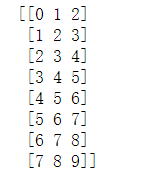 

### **考虑两组点集P0和P1去描述一组线(二维)和一个点p,如何计算点p到每一条线 i (P0[i],P1[i])的距离？**
- `P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))`

【知识点：数学函数】
- 提示 设P(x0,y0)，直线方程为：Ax+By+C=0
则P到直线的距离为:d=|Ax0+By0+C|/√(A²+B²)

### **画正弦函数和余弦函数， x = np.arange(0, 3 * np.pi, 0.1)？**
【知识点：数学函数】

### **减去矩阵每一行的平均值 ？**
【知识点：数学函数】
- 提示: mean(axis=,keepdims=)

### **进行概率统计分析 ？**
- `arr1 = np.random.randint(1,10,10)
arr2 = np.random.randint(1,10,10))
【知识点：数学函数】 
平均数，中位数，方差，标准差，相关性矩阵，协方差矩阵等`


## 逻辑函数

### **获取a和b元素匹配的位置。**
- `a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])`
- `b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])`

【知识点：逻辑函数】
- 如何得到两个数组元素匹配的位置？

### **获取5到10 之间的所有元素。**
- `a = np.array([2, 6, 1, 9, 10, 3, 27])`

【知识点：逻辑函数】
- 如何从numpy数组中提取给定范围内的所有元素？

### **对于两个随机数组A和B,检查他们是否相等**
- `A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)`

【知识点：逻辑函数】

- (提示: np.allclose, np.array_equal)

### **何对布尔值取反，或者原位(in-place)改变浮点数的符号(sign)？**

【知识点：逻辑函数】
- (提示: np.logical_not, np.negative)

### **找出数组中与给定值最接近的数**

【知识点：逻辑函数】
- (提示: np.abs().argmin())

# 参考答案

## 数学函数

**将数组a中大于30的值替换为30，小于10的值替换为10。**

- `a = np.random.uniform(1, 50, 20)`

【知识点：数学函数、搜索】
- 如何将大于给定值的所有值替换为给定的截止值？

In [353]:
import numpy as np

np.set_printoptions(precision=2)
np.random.seed(100)
a = np.random.uniform(1, 50, 20)
print(a)
# [27.63 14.64 21.8  42.39  1.23  6.96 33.87 41.47  7.7  29.18 44.67 11.25
#  10.08  6.31 11.77 48.95 40.77  9.43 41.   14.43]

# 方法1
b = np.clip(a, a_min=10, a_max=30)
print(b)
# [27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
#  10.08 10.   11.77 30.   30.   10.   30.   14.43]

# 方法2
b = np.where(a < 10, 10, a)
b = np.where(b > 30, 30, b)
print(b)
# [27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
#  10.08 10.   11.77 30.   30.   10.   30.   14.43]

[27.63 14.64 21.8  42.39  1.23  6.96 33.87 41.47  7.7  29.18 44.67 11.25
 10.08  6.31 11.77 48.95 40.77  9.43 41.   14.43]
[27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
 10.08 10.   11.77 30.   30.   10.   30.   14.43]
[27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
 10.08 10.   11.77 30.   30.   10.   30.   14.43]



**找到一个一维数字数组a中的所有峰值。峰顶是两边被较小数值包围的点。**

- `a = np.array([1, 3, 7, 1, 2, 6, 0, 1])`

【知识点：数学函数、搜索】
- 如何在一维数组中找到所有的局部极大值（或峰值）？

In [354]:
import numpy as np

a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
b1 = np.diff(a)
b2 = np.sign(b1)
b3 = np.diff(b2)

print(b1)  # [ 2  4 -6  1  4 -6  1]
print(b2)  # [ 1  1 -1  1  1 -1  1]
print(b3)  # [ 0 -2  2  0 -2  2]
index = np.where(np.equal(b3, -2))[0] + 1
print(index) # [2 5]

[ 2  4 -6  1  4 -6  1]
[ 1  1 -1  1  1 -1  1]
[ 0 -2  2  0 -2  2]
[2 5]


**对于给定的一维数组，计算窗口大小为3的移动平均值。**

- `z = np.random.randint(10, size=10)`

【知识点：数学函数】
- 如何计算numpy数组的移动平均值？

In [355]:
import numpy as np

np.random.seed(100)
z = np.random.randint(10, size=10)
print(z)
# [8 8 3 7 7 0 4 2 5 2]

def MovingAverage(arr, n=3):
    a = np.cumsum(arr)
    a[n:] = a[n:] - a[:-n]
    return a[n - 1:] / n


r = MovingAverage(z, 3)
print(np.around(r, 2))
# [6.33 6.   5.67 4.67 3.67 2.   3.67 3.  ]

[8 8 3 7 7 0 4 2 5 2]
[6.33 6.   5.67 4.67 3.67 2.   3.67 3.  ]


**对一个5x5的随机矩阵做归一化**

【知识点：数学函数】
- (提示: (x - min) / (max - min))

In [356]:
Z = np.random.random((5,5))
Zmax, Zmin = Z.max(), Z.min()
Z = (Z - Zmin)/(Zmax - Zmin)
print(Z)

[[0.22 0.47 0.92 0.06 0.65]
 [0.55 0.59 0.   0.32 1.  ]
 [0.13 0.08 0.32 0.66 0.73]
 [0.67 0.97 0.31 0.6  0.18]
 [0.56 0.68 0.14 0.61 0.5 ]]


**用五种不同的方法去提取一个随机数组的整数部分**

【知识点：数学函数】

- (提示: %, np.floor, np.ceil, astype, np.trunc)

In [357]:
Z = np.random.uniform(0,10,10)

print (Z - Z%1)
print (np.floor(Z))
print (np.ceil(Z)-1)
print (Z.astype(int))
print (np.trunc(Z))

[3. 4. 4. 4. 0. 7. 5. 3. 5. 9.]
[3. 4. 4. 4. 0. 7. 5. 3. 5. 9.]
[3. 4. 4. 4. 0. 7. 5. 3. 5. 9.]
[3 4 4 4 0 7 5 3 5 9]
[3. 4. 4. 4. 0. 7. 5. 3. 5. 9.]


**考虑一维数组Z，构建一个二维数组，其第一行为（Z [0]，Z [1]，Z [2]），随后的每一行都移位1（最后一行应为（Z [ -3]，Z [-2]，Z [-1]）**

【知识点：数学函数】

- （提示np.lib.stride_tricks）

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]--------> 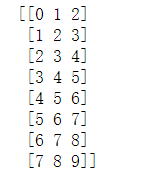     

In [358]:
np.arange(10).itemsize

8

In [359]:
from numpy.lib import stride_tricks
def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.itemsize, a.itemsize)
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10), 3)
print (Z)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


**考虑两组点集P0和P1去描述一组线(二维)和一个点p,如何计算点p到每一条线 i (P0[i],P1[i])的距离？**

【知识点：数学函数】
- 提示 设P(x0,y0)，直线方程为：Ax+By+C=0
则P到直线的距离为:d=|Ax0+By0+C|/√(A²+B²)


In [360]:
import numpy as np
def distance(P0,P1,p):
    A=-1/(P1[:,0]-P0[:,0])
    B=1/(P1[:,1]-P0[:,1])
    C=P0[:,0]/(P1[:,0]-P0[:,0])-P0[:,1]/(P1[:,1]-P0[:,1])
    return np.abs(A*p[:,0]+B*p[:,1]+C)/np.sqrt(A**2+B**2)

In [361]:
P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))

print (distance(P0, P1, p))

[1.31e+01 9.93e+00 1.04e-02 5.54e+00 7.57e+00 1.04e+01 3.07e-01 6.24e+00
 2.98e+00 9.87e+00]


 **画正弦函数和余弦函数， x = np.arange(0, 3 * np.pi, 0.1)？**

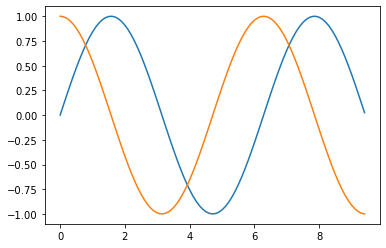

In [362]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(0, 3*np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1)
plt.plot(x, y2)

**减去矩阵每一行的平均值 ？**

In [363]:
X = np.random.rand(5, 10)
# 新
Y = X - X.mean(axis=1, keepdims=True)
# 旧
Y = X - X.mean(axis=1).reshape(-1, 1)
print(Y)

[[ 0.06 -0.17  0.52 -0.28 -0.24  0.09 -0.36 -0.12  0.51 -0.03]
 [ 0.05  0.17 -0.3  -0.05 -0.05  0.47 -0.14 -0.19  0.4  -0.36]
 [ 0.24 -0.45  0.11 -0.46  0.37 -0.05  0.07  0.33 -0.4   0.22]
 [-0.05 -0.42 -0.39 -0.    0.54 -0.34  0.11  0.2   0.    0.35]
 [ 0.08  0.1  -0.12  0.11  0.25 -0.06  0.06 -0.25 -0.03 -0.14]]


**进行概率统计分析 ？**
- `arr1 = np.random.randint(1,10,10)
arr2 = np.random.randint(1,10,10))`

In [372]:
#f
arr1 = np.random.randint(1,10,10)
arr2 = np.random.randint(1,10,10)

print("arr1的平均数为:%s" %np.mean(arr1))
print("arr1的中位数为:%s" %np.median(arr1))
print("arr1的方差为:%s" %np.var(arr1))
print("arr1的标准差为:%s" %np.std(arr1))
print("arr1,arr的相关性矩阵为:%s" %np.cov(arr1,arr2))
print("arr1,arr的协方差矩阵为:%s" %np.corrcoef(arr1,arr2))

arr1的平均数为:5.8
arr1的中位数为:6.5
arr1的方差为:4.96
arr1的标准差为:2.227105745132009
arr1,arr的相关性矩阵为:[[5.51 0.8 ]
 [0.8  4.54]]
arr1,arr的协方差矩阵为:[[1.   0.16]
 [0.16 1.  ]]


## 逻辑函数

**获取a和b元素匹配的位置。**
- `a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])`
- `b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])`

【知识点：逻辑函数】
- 如何得到两个数组元素匹配的位置？

In [365]:
import numpy as np

a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])
mask = np.equal(a, b)

# 方法1
x = np.where(mask)
print(x)  # (array([1, 3, 5, 7], dtype=int64),)

# 方法2
x = np.nonzero(mask)
print(x)  # (array([1, 3, 5, 7], dtype=int64),)

(array([1, 3, 5, 7]),)
(array([1, 3, 5, 7]),)


**获取5到10 之间的所有元素。**
- `a = np.array([2, 6, 1, 9, 10, 3, 27])`

【知识点：逻辑函数】
- 如何从numpy数组中提取给定范围内的所有元素？

In [366]:
import numpy as np

a = np.array([2, 6, 1, 9, 10, 3, 27])
mask = np.logical_and(np.greater_equal(a, 5), np.less_equal(a, 10))

# 方法1
x = np.where(mask)
print(a[x])  # [ 6  9 10]

# 方法2
x = np.nonzero(mask)
print(a[x])  # [ 6  9 10]

# 方法3
x = a[np.logical_and(a >= 5, a <= 10)]
print(x)  # [ 6  9 10]

[ 6  9 10]
[ 6  9 10]
[ 6  9 10]


**对于两个随机数组A和B,检查他们是否相等**

【知识点：逻辑函数】

- (提示: np.allclose, np.array_equal)

In [367]:
A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)

In [368]:

# Assuming identical shape of the arrays and a tolerance for the comparison of values
equal = np.allclose(A,B)
print(equal)

False


**何对布尔值取反，或者原位(in-place)改变浮点数的符号(sign)？**

【知识点：逻辑函数】
- (提示: np.logical_not, np.negative)

In [369]:
Z = np.array([0,1])
print(Z)
np.logical_not(Z, out=Z)
# Z = np.random.uniform(-1.0,1.0,100)

# np.negative(Z, out=Z)

[0 1]


array([1, 0])

In [370]:
Z = np.array([0.2,1.15])
print(Z)
np.negative(Z, out=Z)

[0.2  1.15]


array([-0.2 , -1.15])

**找出数组中与给定值最接近的数**

In [371]:
Z=np.array([[0,1,2,3],[4,5,6,7]])
print(Z)
z=5.1
np.abs(Z - z).argmin()
print(Z.flat[np.abs(Z - z).argmin()])

[[0 1 2 3]
 [4 5 6 7]]
5
